<h1>Week 6</h1>
<h2>Question 1:</h2>

In [1]:
# ANALYTICAL METHOD

import sympy as sp

t, y = sp.symbols('t y')
C = sp.symbols('C')

lhs = 1/y
rhs = t**3 - 1.5

int_lhs = sp.integrate(lhs, y)   # ln(y)
int_rhs = sp.integrate(rhs, t)   # t^4/4 - 1.5*t

general_eq = sp.Eq(int_lhs, int_rhs + C)

y_expr = sp.exp(int_rhs + C)

C_val = sp.solve(sp.Eq(y_expr.subs(t, 0), 1), C)[0]

y_final = y_expr.subs(C, C_val)

y_at_2 = y_final.subs(t, 2).evalf()

print("C =", C_val)
print("y(t) =", y_final)
print("y(2) =", y_at_2)


C = 0
y(t) = exp(0.25*t**4 - 1.5*t)
y(2) = 2.71828182845905


In [2]:
# EULER'S METHOD With h = 0.5

def func(t,y):
    return (y * (t ** 3)) - (1.5 * y)
    
def EulerMethod(t_prev, y_given, t_pred, h, t):
    y_prev = y_given
    while(t <= t_pred):
        y = y_prev + (h*func(t_prev, y_prev))
        t_prev = t
        y_prev = y
        print(f'y({t}): {y}')
        t += h
        
t_given = 0
y_given = 1
t_pred = 2
h = 0.5
t = t_given + h
print(f'y({t_given}): {y_given}')
EulerMethod(t_given, y_given, t_pred, h, t)


y(0): 1
y(0.5): 0.25
y(1.0): 0.078125
y(1.5): 0.05859375
y(2.0): 0.113525390625


In [3]:
# EULER'S METHOD With h = 0.25

def func(t,y):
    return (y * (t ** 3)) - (1.5 * y)
    
def EulerMethod(t_prev, y_given, t_pred, h, t):
    y_prev = y_given
    while(t <= t_pred):
        y = y_prev + (h*func(t_prev, y_prev))
        t_prev = t
        y_prev = y
        print(f'y({t}): {y}')
        t += h
        
t_given = 0
y_given = 1
t_pred = 2
h = 0.25
t = t_given + h
print(f'y({t_given}): {y_given}')
EulerMethod(t_given, y_given, t_pred, h, t)


y(0): 1
y(0.25): 0.625
y(0.5): 0.39306640625
y(0.75): 0.2579498291015625
y(1.0): 0.18842428922653198
y(1.25): 0.16487125307321548
y(1.5): 0.18354807471041568
y(1.75): 0.269586234730923
y(2.0): 0.529694828397087


In [4]:
# RK FOURTH-ORDER

def func(t,y):
    return (y * (t ** 3)) - (1.5 * y)

def RKFourthOrder(t_given, y_given, t_pred, h, t):
    t_prev = t_given
    y_prev = y_given
    while(t <= t_pred):
        k1 = func(t_prev, y_prev)
        k2 = func((t_prev + (0.5 * h)), (y_prev + (0.5 * k1 * h)))
        k3 = func((t_prev + (0.5 * h)), (y_prev + (0.5 * k2 * h)))
        k4 = func((t_prev + h), (y_prev + (k3 * h)))
        y = y_prev + ((1 / 6) * (k1 + (2*k2) + (2*k3) + k4) * h)
        t_prev = t
        y_prev = y
        print(f'y({t}): {y}')
        t += h        
        
t_given = 0
y_given = 1
t_pred = 2
h = 0.5
t = t_given + h
print(f'y({t_given}): {y_given}')
RKFourthOrder(t_given, y_given, t_pred, h, t)  

y(0): 1
y(0.5): 0.4810959895451864
y(1.0): 0.2869322543704177
y(1.5): 0.37375219279896077
y(2.0): 2.5130724732170266


/home/root123/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


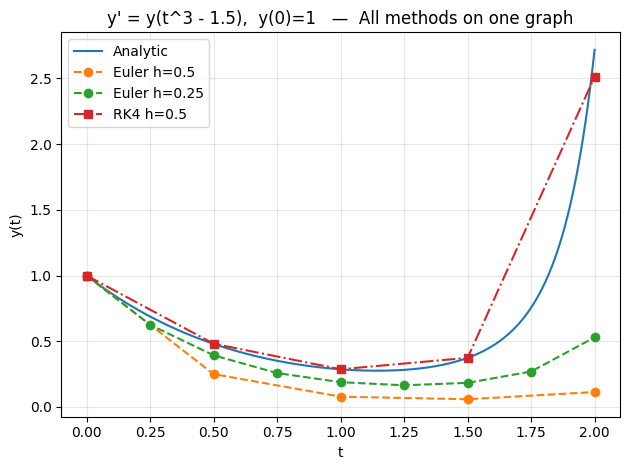


Checkpoints:
Exact y(0)=1, y(1)=exp(-1.25)≈0.286505, y(2)=e≈2.718282

Final values at t=2:
Analytic:      y(2) = 2.718282
Euler  h=0.50: y(2) = 0.113525   |y(2)-exact| = 2.604756e+00
Euler  h=0.25: y(2) = 0.529695  |y(2)-exact| = 2.188587e+00
RK4    h=0.50: y(2) = 2.513072  |y(2)-exact| = 2.052094e-01


In [5]:
# Combined: Analytic + Euler (h=0.5, 0.25) + RK4 (h=0.5) with one plot

import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    return y * (t**3 - 1.5)

def y_true(t):
    return np.exp(0.25 * t**4 - 1.5 * t)

# ---------------------------
# Integrators
# ---------------------------
def make_grid(t0, T, h):
    n = int(round((T - t0) / h))
    return t0 + h * np.arange(n + 1, dtype=float)

def euler(f, t0, y0, h, T):
    t = make_grid(t0, T, h)
    y = np.empty_like(t)
    y[0] = y0
    for n in range(len(t) - 1):
        y[n+1] = y[n] + h * f(t[n], y[n])
    return t, y

def rk4(f, t0, y0, h, T):
    t = make_grid(t0, T, h)
    y = np.empty_like(t)
    y[0] = y0
    for n in range(len(t) - 1):
        tn, yn = t[n], y[n]
        k1 = f(tn, yn)
        k2 = f(tn + 0.5*h, yn + 0.5*h*k1)
        k3 = f(tn + 0.5*h, yn + 0.5*h*k2)
        k4 = f(tn + h,     yn + h*k3)
        y[n+1] = yn + (h/6.0) * (k1 + 2*k2 + 2*k3 + k4)
    return t, y


t0, T, y0 = 0.0, 2.0, 1.0

# Analytical
t_dense = np.linspace(t0, T, 600)
y_dense = y_true(t_dense)

# Euler h=0.5 and h=0.25
t_eu_05, y_eu_05   = euler(f, t0, y0, h=0.5,  T=T)
t_eu_025, y_eu_025 = euler(f, t0, y0, h=0.25, T=T)

# RK4 h=0.5
t_rk4_05, y_rk4_05 = rk4(f, t0, y0, h=0.5,  T=T)

# Graphing
plt.figure()
plt.plot(t_dense,  y_dense,     label="Analytic")
plt.plot(t_eu_05,  y_eu_05,  marker="o", linestyle="--", label="Euler h=0.5")
plt.plot(t_eu_025, y_eu_025, marker="o", linestyle="--", label="Euler h=0.25")
plt.plot(t_rk4_05, y_rk4_05, marker="s", linestyle="-.", label="RK4 h=0.5")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("y' = y(t^3 - 1.5),  y(0)=1   —  All methods on one graph")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Summary report
y2_exact   = float(y_true(2.0))
y2_eu_05   = float(y_eu_05[-1])
y2_eu_025  = float(y_eu_025[-1])
y2_rk4_05  = float(y_rk4_05[-1])

print("\nCheckpoints:")
print(f"Exact y(0)=1, y(1)=exp(-1.25)≈{np.exp(-1.25):.6f}, y(2)=e≈{np.e:.6f}")
print("\nFinal values at t=2:")
print(f"Analytic:      y(2) = {y2_exact:.6f}")
print(f"Euler  h=0.50: y(2) = {y2_eu_05:.6f}   |y(2)-exact| = {abs(y2_eu_05 - y2_exact):.6e}")
print(f"Euler  h=0.25: y(2) = {y2_eu_025:.6f}  |y(2)-exact| = {abs(y2_eu_025 - y2_exact):.6e}")
print(f"RK4    h=0.50: y(2) = {y2_rk4_05:.6f}  |y(2)-exact| = {abs(y2_rk4_05 - y2_exact):.6e}")


<h1>Week 6</h1>
<h2>Question 2:</h2>

In [6]:
# ANALYTICAL METHOD

import sympy as sp

x = sp.symbols('x', real=True, nonnegative=True)
y_var = sp.symbols('y')
C = sp.symbols('C')

int_lhs = sp.integrate(1/(1 + 2*y_var), (y_var))
int_rhs = sp.integrate(sp.sqrt(x), (x))

eq = sp.Eq(int_lhs, int_rhs + C)

y_expr_general = (sp.exp(2*(int_rhs + C)) - 1) / 2

C_val = sp.solve(sp.Eq(y_expr_general.subs(x, 0), 1), C)[0]

y_final = sp.simplify(y_expr_general.subs(C, C_val))

y_at_1 = sp.N(y_final.subs(x, 1))

print("∫ dy/(1+2y) =", int_lhs)
print("∫ sqrt(x) dx =", int_rhs)
print("C =", C_val)
print("y(x) =", y_final)
print("y(1) =", y_at_1)



∫ dy/(1+2y) = log(2*y + 1)/2
∫ sqrt(x) dx = 2*x**(3/2)/3
C = log(3)/2 + I*pi
y(x) = 3*exp(4*x**(3/2)/3)/2 - 1/2
y(1) = 5.19050184202477


In [7]:
# EULER'S METHOD With h = 0.25

def func(x,y):
    return ((1 + 2*y) * x**0.5)
    
def EulerMethod(x_prev, y_given, x_pred, h, x):
    y_prev = y_given
    while(x <= x_pred):
        y = y_prev + (h*func(x_prev, y_prev))
        x_prev = x
        y_prev = y
        print(f'y({x}): {y}')
        x += h
        
x_given = 0
y_given = 1
x_pred = 1
h = 0.25
x = x_given + h
print(f'y({x_given}): {y_given}')
EulerMethod(x_given, y_given, x_pred, h, x)


y(0): 1
y(0.25): 1.0
y(0.5): 1.375
y(0.75): 2.0379126073623883
y(1.0): 3.1368610026427035


In [8]:
# RK FOURTH-ORDER

def func(x,y):
    return ((1 + 2*y) * x**0.5)

def RKFourthOrder(x_given, y_given, x_pred, h, x):
    x_prev = x_given
    y_prev = y_given
    while(x <= x_pred):
        k1 = func(x_prev, y_prev)
        k2 = func((x_prev + (0.5 * h)), (y_prev + (0.5 * k1 * h)))
        k3 = func((x_prev + (0.5 * h)), (y_prev + (0.5 * k2 * h)))
        k4 = func((x_prev + h), (y_prev + (k3 * h)))
        y = y_prev + ((1 / 6) * (k1 + (2*k2) + (2*k3) + k4) * h)
        x_prev = x
        y_prev = y
        print(f'y({x}): {y}')
        x += h        
        
x_given = 0
y_given = 1
x_pred = 1
h = 0.25
x = x_given + h
print(f'y({x_given}): {y_given}')
RKFourthOrder(x_given, y_given, x_pred, h, x)  

y(0): 1
y(0.25): 1.2591143012526766
y(0.5): 1.885714087018869
y(0.75): 3.0397250036915624
y(1.0): 5.147546634590661


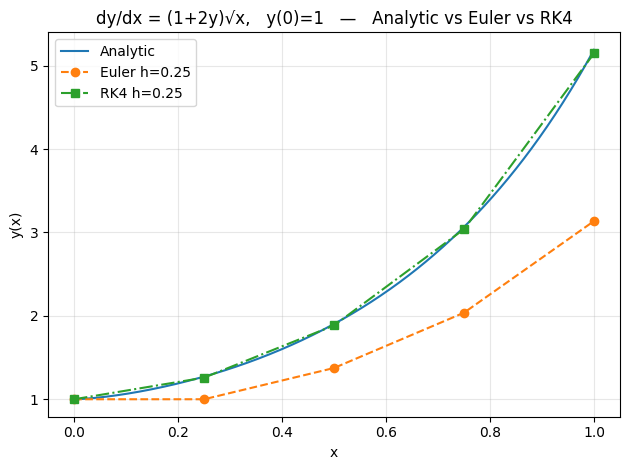

Values at x = 1:
Analytic:      y(1) = 5.190501842
Euler h=0.25:  y(1) = 3.136861003   |err| = 2.053641e+00
RK4   h=0.25:  y(1) = 5.147546635  |err| = 4.295521e-02

Node-by-node table:
x=0.00  Euler=1.000000  RK4=1.000000  Exact=1.000000
x=0.25  Euler=1.000000  RK4=1.259114  Exact=1.272041
x=0.50  Euler=1.375000  RK4=1.885714  Exact=1.903364
x=0.75  Euler=2.037913  RK4=3.039725  Exact=3.066164
x=1.00  Euler=3.136861  RK4=5.147547  Exact=5.190502


In [9]:
# Q2: Analytic + Euler (h=0.25) + RK4 (h=0.25) on one plot

import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return (1.0 + 2.0*y) * np.sqrt(x)

def y_true(x):
    return (3.0 * np.exp((4.0/3.0) * x**1.5) - 1.0) / 2.0

def make_grid(x0, X, h):
    n = int(round((X - x0) / h))
    return x0 + h * np.arange(n + 1, dtype=float)

def euler(f, x0, y0, h, X):
    x = make_grid(x0, X, h)
    y = np.empty_like(x)
    y[0] = y0
    for n in range(len(x) - 1):
        y[n+1] = y[n] + h * f(x[n], y[n])
    return x, y

def rk4(f, x0, y0, h, X):
    x = make_grid(x0, X, h)
    y = np.empty_like(x)
    y[0] = y0
    for n in range(len(x) - 1):
        xn, yn = x[n], y[n]
        k1 = f(xn, yn)
        k2 = f(xn + 0.5*h, yn + 0.5*h*k1)
        k3 = f(xn + 0.5*h, yn + 0.5*h*k2)
        k4 = f(xn + h,     yn + h*k3)
        y[n+1] = yn + (h/6.0) * (k1 + 2*k2 + 2*k3 + k4)
    return x, y

x0, X, y0 = 0.0, 1.0, 1.0
h = 0.25

x_dense = np.linspace(x0, X, 600)
y_dense = y_true(x_dense)

# Euler and RK4 (h = 0.25)
x_eu,  y_eu  = euler(f, x0, y0, h=h, X=X)
x_rk4, y_rk4 = rk4(f, x0, y0, h=h, X=X)

# Exact at method nodes (for error summaries)
y_exact_nodes = y_true(x_eu)

# Graphing
plt.figure()
plt.plot(x_dense, y_dense, label="Analytic")
plt.plot(x_eu,  y_eu,  marker="o", linestyle="--", label="Euler h=0.25")
plt.plot(x_rk4, y_rk4, marker="s", linestyle="-.", label="RK4 h=0.25")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title("dy/dx = (1+2y)√x,   y(0)=1   —   Analytic vs Euler vs RK4")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

y1_exact = float(y_true(1.0))
y1_eu    = float(y_eu[-1])
y1_rk4   = float(y_rk4[-1])

print("Values at x = 1:")
print(f"Analytic:      y(1) = {y1_exact:.9f}")
print(f"Euler h=0.25:  y(1) = {y1_eu:.9f}   |err| = {abs(y1_eu - y1_exact):.6e}")
print(f"RK4   h=0.25:  y(1) = {y1_rk4:.9f}  |err| = {abs(y1_rk4 - y1_exact):.6e}")

print("\nNode-by-node table:")
for xe, ye, yr, yt in zip(x_eu, y_eu, y_rk4, y_exact_nodes):
    print(f"x={xe:.2f}  Euler={ye:.6f}  RK4={yr:.6f}  Exact={yt:.6f}")
